In [382]:
import pandas as pd
import numpy as np
from numpy.random import seed

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

In [383]:
seed(100)

In [384]:
df = pd.read_csv("default_of_credit_card_client_processed.csv")
del df['Unnamed: 0']
del df['ID']
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,b4,b5,ta0,ta1,ta2,ta3,ta4,ta5,SC,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,1,1,0,0,0,1,1,1,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,90000,2,2,2,34,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,50000,2,2,1,37,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [385]:
cols = np.transpose(df.columns.tolist())
cols, cols.shape

(array(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
        'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
        'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
        'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
        'PAY_AMT6', 'p0', 'p1', 'p2', 'p3', 'p4', 'p5', 'b0', 'b1', 'b2',
        'b3', 'b4', 'b5', 'ta0', 'ta1', 'ta2', 'ta3', 'ta4', 'ta5', 'SC',
        'default payment next month'], dtype='<U26'),
 (43,))

In [386]:
colsX = cols[0:len(cols)-1]
#colsX = cols[0:23]
colsX

array(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'p0', 'p1', 'p2', 'p3', 'p4', 'p5', 'b0', 'b1', 'b2',
       'b3', 'b4', 'b5', 'ta0', 'ta1', 'ta2', 'ta3', 'ta4', 'ta5', 'SC'],
      dtype='<U26')

In [387]:
X = df[colsX].values
X.shape

(29134, 42)

In [388]:
y = df['default payment next month'].values
y.shape

(29134,)

In [389]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

In [390]:
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, roc_curve

In [391]:
X = StandardScaler().fit(X).transform(X)
X.mean(), X.std()

(2.0672395035958287e-18, 0.9999999999999999)

In [392]:
X_tr, X_t, y_tr, y_t = train_test_split(X, y, test_size=0.3, random_state=100)
X_tr.shape, X_t.shape

((20393, 42), (8741, 42))

In [393]:
clf = SVC(probability=True, kernel='linear', gamma='auto', max_iter = -1) # -1 default
clf.fit(X_tr, y_tr)
y_p = clf.predict(X_t)

In [394]:
predicted_probability = clf.predict_proba(X_t)

In [395]:
predicted_probability[0:5]

array([[0.85792378, 0.14207622],
       [0.85790941, 0.14209059],
       [0.85793378, 0.14206622],
       [0.85790714, 0.14209286],
       [0.85793856, 0.14206144]])

In [396]:
print("ROC score : ", roc_auc_score(y_t, y_p), ", accuracy: ", accuracy_score(y_t, y_p))

ROC score :  0.6865095885780561 , accuracy:  0.8124928497883538


In [397]:
FPR, TPR, _ = roc_curve(y_t,predicted_probability[:,1])
fpr_nc, tpr_nc, _ = roc_curve(y_t, np.zeros(len(y_t)))

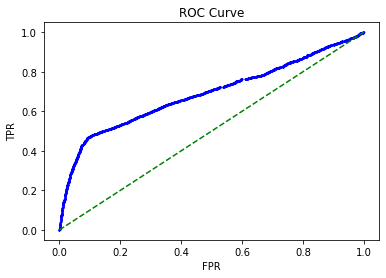

In [398]:
plt.plot(FPR, TPR, 'd b', MarkerSize=1.2)
plt.plot(fpr_nc, tpr_nc, 'g', linestyle="--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()